In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re

In [127]:
import nltk

In [128]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [129]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.1/12.8 MB 409.6 kB/s eta 0:00:32
     --------------------------------------- 0.1/12.8 MB 654.9 kB/s eta 0:00:20
      -------------------------------------- 0.2/12.8 MB 807.1 kB/s eta 0:00:16
      -------------------------------------- 0.2/12.8 MB 919.0 kB/s eta 0:00:14
      -------------------------------------- 0.2/12.8 MB 793.0 kB/s eta 0:00:16
      -------------------------------------- 0.3/12.8 MB 842.9 kB/s eta 0:00:15
      -------------------------------------- 0.3/12.8 MB 865.8 kB/s eta 0:00:15
     - ------------------------------------- 0.4/12.8 MB 825.0 kB/

In [130]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


In [131]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_

True

In [132]:
import re
import string
from nltk.corpus import stopwords
stop_words=stopwords.words()

In [133]:
df=pd.read_csv('blogs.csv')

In [134]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [136]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [137]:
## EDA and Data Processing

In [138]:
df['Labels'].value_counts()

alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64

<Axes: >

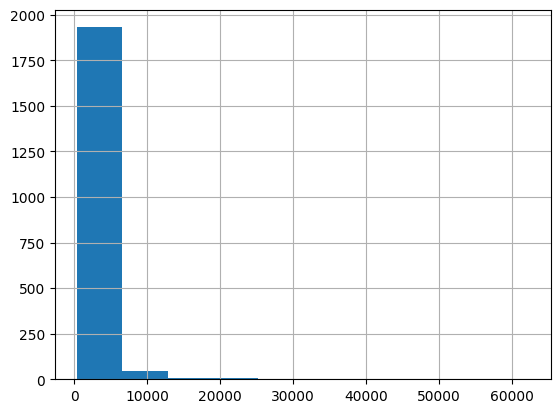

In [139]:
df['Data'].str.len().hist()

In [140]:
import spacy
nlp=spacy.load('en_core_web_sm')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stem=PorterStemmer()



In [141]:
# Text cleaning

def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.!*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
   
    #removing emoji: 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   

   # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    
     
    return text    

In [142]:
dt = df['Data'].apply(cleaning)

In [143]:
dt=pd.DataFrame(dt)

In [144]:
dt['Labels']=df['Labels']

In [145]:
dt.head()

,Data,Labels
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
1,newsgroups altatheismpath cantaloupesrvcscmued...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism


In [146]:
# remove stop word: 
dt['no_stopw'] = dt['Data'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [147]:
dt.head()

,Data,Labels,no_stopw
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,newsgroups altatheismpath cantaloupesrvcscmued...,alt.atheism,newsgroups altatheismpath cantaloupesrvcscmued...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...


In [148]:
#Working with the most Frequent Words: 

In [149]:
from collections import Counter

In [150]:
cnt = Counter()
for text in dt["no_stopw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10),columns=['word', 'count'])
temp

,word,count
0,apr,1945
1,article,1280
2,university,849
3,path,768
4,newsgroups,740
5,gmtlines,728
6,writes,695
7,time,629
8,xref,574
9,cantaloupesrvcscmuedu,574


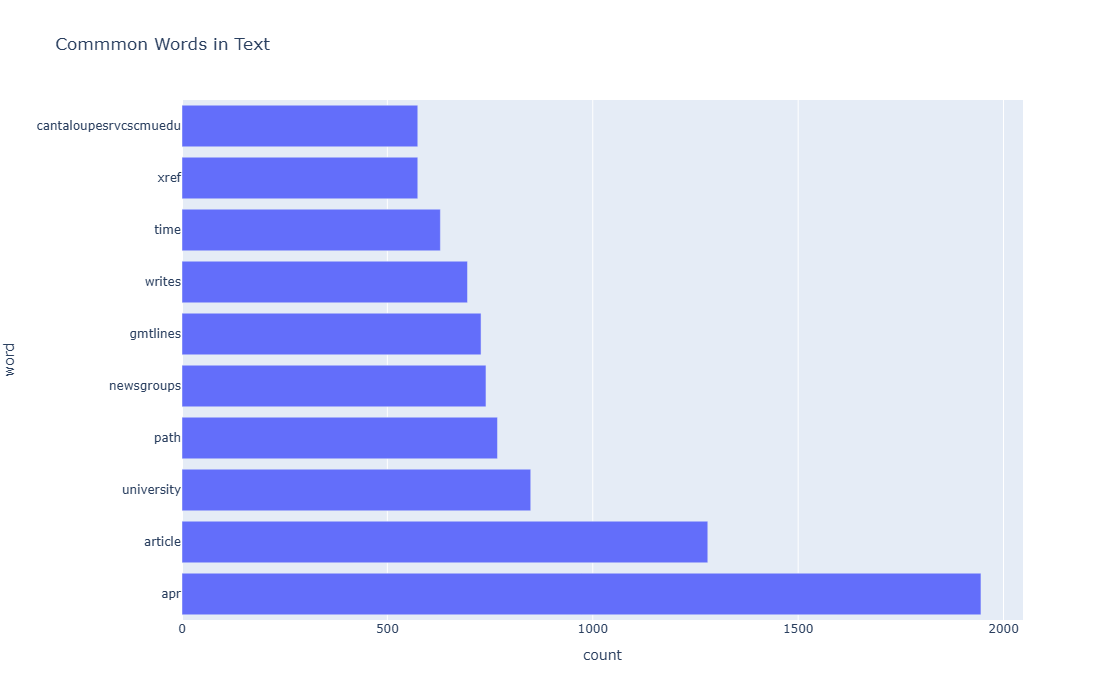

In [151]:
import plotly.express as pe

pe.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)

In [152]:
# Remove the most frequent words:

In [153]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt['no_stopw'].apply(lambda text: remove_freqwords(text))
dt.head()

,Data,Labels,no_stopw,wo_stopfreq
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
1,newsgroups altatheismpath cantaloupesrvcscmued...,alt.atheism,newsgroups altatheismpath cantaloupesrvcscmued...,altatheismpath cantaloupesrvcscmueducrabapples...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,cantaloupesrvcscmuedudasnewsharvardedunocnearn...
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,altatheism talkreligionmisc talkoriginsnewsgro...


In [154]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [155]:
wordnet_lem = WordNetLemmatizer()
dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

,Data,Labels,no_stopw,wo_stopfreq,wo_stopfreq_lem
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
1,newsgroups altatheismpath cantaloupesrvcscmued...,alt.atheism,newsgroups altatheismpath cantaloupesrvcscmued...,altatheismpath cantaloupesrvcscmueducrabapples...,altatheismpath cantaloupesrvcscmueducrabapples...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,cantaloupesrvcscmuedudasnewsharvardedunocnearn...,cantaloupesrvcscmuedudasnewsharvardedunocnearn...
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,altatheism talkreligionmisc talkoriginsnewsgro...,altatheism talkreligionmisc talkoriginsnewsgro...
...,...,...,...,...,...
1995,xref cantaloupesrvcscmuedu talkabortion altath...,talk.religion.misc,xref cantaloupesrvcscmuedu talkabortion altath...,talkabortion altatheism talkreligionmiscpath c...,talkabortion altatheism talkreligionmiscpath c...
1996,xref cantaloupesrvcscmuedu talkreligionmisc ta...,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc ta...,talkreligionmisc talkpoliticsmisc sciskepticne...,talkreligionmisc talkpoliticsmisc sciskepticne...
1997,xref cantaloupesrvcscmuedu talkorigins talkrel...,talk.religion.misc,xref cantaloupesrvcscmuedu talkorigins talkrel...,talkorigins talkreligionmiscpath cantaloupesrv...,talkorigins talkreligionmiscpath cantaloupesrv...
1998,xref cantaloupesrvcscmuedu talkreligionmisc al...,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc al...,talkreligionmisc altsexstoriespath cantaloupes...,talkreligionmisc altsexstoriespath cantaloupes...


In [158]:
## Sentiment Anaalysis

In [159]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [160]:
from textblob import TextBlob

In [178]:
def sentiment(text):
    blob=TextBlob(text)
    sentiment_count=blob.sentiment.polarity
    if sentiment_count>0:
        return 1        ### positive sentiment
    else:
        return 0        ### Negative sentiment

In [162]:
dt['Sentiment_Analysis']=dt['Data'].apply(sentiment)
dt.head()

,Data,Labels,no_stopw,wo_stopfreq,wo_stopfreq_lem,Sentiment_Analysis
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...,1
1,newsgroups altatheismpath cantaloupesrvcscmued...,alt.atheism,newsgroups altatheismpath cantaloupesrvcscmued...,altatheismpath cantaloupesrvcscmueducrabapples...,altatheismpath cantaloupesrvcscmueducrabapples...,0
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,cantaloupesrvcscmuedudasnewsharvardedunocnearn...,cantaloupesrvcscmuedudasnewsharvardedunocnearn...,1
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...,1
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,altatheism talkreligionmisc talkoriginsnewsgro...,altatheism talkreligionmisc talkoriginsnewsgro...,1


In [ ]:
# create the cleaned data for the train-test split:


In [165]:
dm = dt.drop(columns=['Data','no_stopw', 'wo_stopfreq','Sentiment_Analysis'])
dm.columns = ['Labels','review']
dm

,Labels,review
0,alt.atheism,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
1,alt.atheism,altatheismpath cantaloupesrvcscmueducrabapples...
2,alt.atheism,cantaloupesrvcscmuedudasnewsharvardedunocnearn...
3,alt.atheism,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
4,alt.atheism,altatheism talkreligionmisc talkoriginsnewsgro...
...,...,...
1995,talk.religion.misc,talkabortion altatheism talkreligionmiscpath c...
1996,talk.religion.misc,talkreligionmisc talkpoliticsmisc sciskepticne...
1997,talk.religion.misc,talkorigins talkreligionmiscpath cantaloupesrv...
1998,talk.religion.misc,talkreligionmisc altsexstoriespath cantaloupes...


In [170]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(dm['review'])

In [172]:
## Train and Test

In [173]:
from sklearn.model_selection import train_test_split

In [175]:
X=text_counts
y=dm['Labels']

In [176]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=50)

In [177]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 72159)
(400, 72159)
(1600,)
(400,)


In [179]:
from sklearn.naive_bayes import ComplementNB

In [180]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [181]:
cnb=ComplementNB()
cnb.fit(x_train,y_train)

ComplementNB()

In [182]:
y_pred_cnb=cnb.predict(x_test)

In [184]:
accuracy_score_cnb=accuracy_score(y_test,y_pred_cnb)
accuracy_score_cnb

0.9

In [186]:
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_cnb)))

Confusion Matrix:
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0   13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0   2   
1    0  15   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
2    0   1  24   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3    0   0   0  12   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
4    0   0   0   2  12   0   0   0   0   0   0   0   0   0   0   0   0   0   
5    0   1   0   0   0  20   0   0   0   0   0   0   0   0   0   0   0   0   
6    0   0   0   0   0   0  15   0   0   0   0   0   0   0   0   0   0   0   
7    0   0   0   0   0   0   0  23   0   0   0   0   0   0   0   0   0   0   
8    0   0   0   0   0   0   0   0  22   0   0   0   0   0   0   0   0   0   
9    0   0   0   0   0   0   0   0   0  22   1   0   0   0   0   0   0   0   
10   0   0   0   0   0   0   0   0   0   0  17   0   0   0   0   0   0   0   
11   0   0   0   0   0   1   0   0   0   0   0

In [187]:
print('Classification Report:')
print(classification_report(y_test, y_pred_cnb))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.81      0.62      0.70        21
           comp.graphics       0.75      0.88      0.81        17
 comp.os.ms-windows.misc       0.96      0.89      0.92        27
comp.sys.ibm.pc.hardware       0.71      0.92      0.80        13
   comp.sys.mac.hardware       0.86      0.86      0.86        14
          comp.windows.x       0.95      0.95      0.95        21
            misc.forsale       1.00      1.00      1.00        15
               rec.autos       1.00      1.00      1.00        23
         rec.motorcycles       0.96      1.00      0.98        22
      rec.sport.baseball       1.00      0.96      0.98        23
        rec.sport.hockey       0.89      1.00      0.94        17
               sci.crypt       1.00      0.94      0.97        16
         sci.electronics       1.00      0.80      0.89        15
                 sci.med       1.00      0.95      0

In [188]:
from sklearn.naive_bayes import MultinomialNB

In [189]:
mnb=MultinomialNB()

In [191]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [192]:
y_pred_mnb=mnb.predict(x_test)

In [194]:
accuracy_score_mnb=accuracy_score(y_test,y_pred_mnb)
accuracy_score_mnb

0.76

In [195]:
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_mnb)))

Confusion Matrix:
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0   10   0   0   0   0   0   0   0   0   0   0   1   0   0   0   3   0   2   
1    0  15   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
2    0   8  17   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3    0   1   2   8   1   0   0   0   0   0   0   0   1   0   0   0   0   0   
4    0   3   0   3   7   0   0   0   0   0   0   0   0   0   0   0   0   0   
5    0  10   0   1   0  10   0   0   0   0   0   0   0   0   0   0   0   0   
6    0   4   0   0   0   1  10   0   0   0   0   0   0   0   0   0   0   0   
7    0   0   0   0   0   0   0  20   1   0   0   0   0   0   0   0   2   0   
8    0   0   0   0   0   0   0   5  16   0   0   0   0   0   0   0   1   0   
9    0   0   0   0   0   0   0   0   0  20   1   0   0   0   0   1   0   1   
10   0   1   0   0   0   0   0   0   0   0  15   0   0   0   0   0   0   0   
11   0   1   0   0   0   1   0   0   0   0   0

In [196]:
print('Classification Report:')
print(classification_report(y_test, y_pred_mnb))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.71      0.48      0.57        21
           comp.graphics       0.31      0.88      0.46        17
 comp.os.ms-windows.misc       0.89      0.63      0.74        27
comp.sys.ibm.pc.hardware       0.50      0.62      0.55        13
   comp.sys.mac.hardware       0.88      0.50      0.64        14
          comp.windows.x       0.83      0.48      0.61        21
            misc.forsale       1.00      0.67      0.80        15
               rec.autos       0.74      0.87      0.80        23
         rec.motorcycles       0.94      0.73      0.82        22
      rec.sport.baseball       1.00      0.87      0.93        23
        rec.sport.hockey       0.88      0.88      0.88        17
               sci.crypt       0.88      0.88      0.88        16
         sci.electronics       0.90      0.60      0.72        15
                 sci.med       1.00      0.90      0

In [197]:
### Bernouli naive bayes model

In [198]:
from sklearn.naive_bayes import BernoulliNB

In [199]:
bnb=BernoulliNB()

In [200]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [201]:
y_pred_bnb=bnb.predict(x_test)

In [205]:
accuracy_score_bnb=accuracy_score(y_pred_bnb,y_test)


In [206]:
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_bnb)))

Confusion Matrix:
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    2   0   0   5  14   0   0   0   0   0   0   0   0   0   0   0   0   0   
1    0   0   0   6  10   0   1   0   0   0   0   0   0   0   0   0   0   0   
2    0   0   0  14  12   0   1   0   0   0   0   0   0   0   0   0   0   0   
3    0   0   0  10   3   0   0   0   0   0   0   0   0   0   0   0   0   0   
4    0   0   0   3  11   0   0   0   0   0   0   0   0   0   0   0   0   0   
5    0   0   0   6  13   0   2   0   0   0   0   0   0   0   0   0   0   0   
6    0   0   0   0   1   0  14   0   0   0   0   0   0   0   0   0   0   0   
7    0   0   0   5  14   0   4   0   0   0   0   0   0   0   0   0   0   0   
8    0   0   0   6  15   0   0   0   1   0   0   0   0   0   0   0   0   0   
9    0   0   0   3  15   0   3   0   0   0   2   0   0   0   0   0   0   0   
10   0   0   0   1  10   0   2   0   0   0   3   0   0   0   0   0   0   0   
11   0   0   0  10   4   0   0   0   0   0   0

In [207]:
print('Classification Report:')
print(classification_report(y_test, y_pred_bnb))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.67      0.10      0.17        21
           comp.graphics       0.00      0.00      0.00        17
 comp.os.ms-windows.misc       0.00      0.00      0.00        27
comp.sys.ibm.pc.hardware       0.10      0.77      0.17        13
   comp.sys.mac.hardware       0.05      0.79      0.09        14
          comp.windows.x       0.00      0.00      0.00        21
            misc.forsale       0.42      0.93      0.58        15
               rec.autos       0.00      0.00      0.00        23
         rec.motorcycles       1.00      0.05      0.09        22
      rec.sport.baseball       0.00      0.00      0.00        23
        rec.sport.hockey       0.60      0.18      0.27        17
               sci.crypt       1.00      0.12      0.22        16
         sci.electronics       1.00      0.40      0.57        15
                 sci.med       1.00      0.05      0